In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray
from uncertainties import unumpy as unp 
import scipy.constants as const

Messung Acrylplatte

In [14]:
minima = [4.25, 4.5, 4.75, 4.5, 3.5, 4.75]
minima_ufloat = ufloat(np.mean(minima), np.std(minima))
c_acryl = 2 /(10**(-6) *  minima_ufloat) * 0.006
f = 2.174
lam = c_acryl / f
print(lam)

(1.26+/-0.12)e+03


Erstellen der Plots für die Zylinder beim Impuls-Echo-Verfahren

a = 2.7379754826287193 ± 0.012046597343505504
b = -2.413288467375823 ± 0.7649357863187409


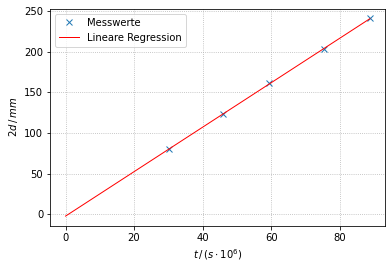

In [36]:
# Daten einlesen
d = np.array([0.0404, 0.0615, 0.0805, 0.1019, 0.1205]) * 10**3
time = np.array([30.3, 46.0, 59.5, 75.5, 88.8])

params, covariance_matrix = np.polyfit(time, 2*d, deg=1, cov=True)

errors = np.sqrt(np.diag(covariance_matrix))

for name, value, error in zip('ab', params, errors):
    print(f'{name} = {value} ± {error}')

x_plot = np.linspace(0, np.max(time))

plt.plot(time, 2*d, 'x', label="Messwerte")
plt.plot(
    x_plot,
    params[0] * x_plot + params[1],
    label='Lineare Regression',
    linewidth=1,
    color='red',
)
plt.xlabel(r'$t \, / \, ( s \cdot 10^6)$')
plt.ylabel(r'$ 2 d \, / \, mm$')
plt.grid(ls=':')
plt.legend(loc="best")

Zweite Plot für Durchschallungsverfahren

a = 2.7611012433392537 ± 0.035979363065235796
b = -4.208880994671382 ± 1.1101892919617515


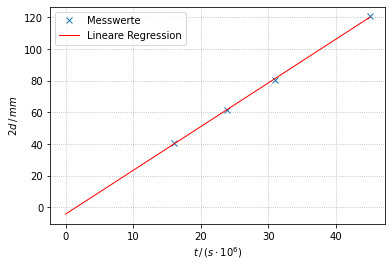

In [37]:
# Daten einlesen
d = np.array([0.0404, 0.0615, 0.0805, 0.1205]) * 10**3
time = np.array([16.0, 23.8, 31.0, 45.0])

params, covariance_matrix = np.polyfit(time, d, deg=1, cov=True)

errors = np.sqrt(np.diag(covariance_matrix))

for name, value, error in zip('ab', params, errors):
    print(f'{name} = {value} ± {error}')

x_plot = np.linspace(0, np.max(time))

plt.plot(time, d, 'x', label="Messwerte")
plt.plot(
    x_plot,
    params[0] * x_plot + params[1],
    label='Lineare Regression',
    linewidth=1,
    color='red',
)
plt.xlabel(r'$t \, / \, ( s \cdot 10^6)$')
plt.ylabel(r'$ 2 d \, / \, mm$')
plt.grid(ls=':')
plt.legend(loc="best")

Erstellung des Fits der Dämpfung

a = 28.316440768017525 ± 1.299846898386778
b = -1.9381731226721257 ± 0.22302439595585596


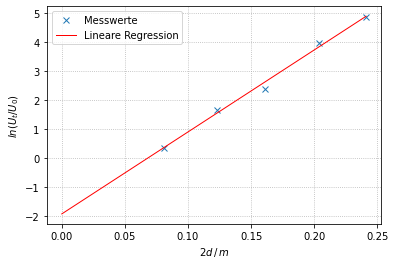

In [59]:
# Daten einlesen
d = np.array([0.0404, 0.0615, 0.0805, 0.1019, 0.1205]) * 2
I = np.array([0.92, 0.25, 0.12, 0.025, 0.01])
I_plot = -np.log(I / 1.31) # 1.31 = u_0

params, covariance_matrix = np.polyfit(d, I_plot, deg=1, cov=True)

errors = np.sqrt(np.diag(covariance_matrix))

for name, value, error in zip('ab', params, errors):
    print(f'{name} = {value} ± {error}')

x_plot = np.linspace(0, np.max(d))

plt.plot(d, I_plot, 'x', label="Messwerte")
plt.plot(
    x_plot,
    params[0] * x_plot + params[1],
    label='Lineare Regression',
    linewidth=1,
    color='red',
)
plt.xlabel(r'$ 2 d \, / \, m$')
plt.ylabel(r'$ln (U_t / U_0)$')
plt.grid(ls=':')
plt.legend(loc="best")